<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    Sneakers Recognition
  </h1>
</div>

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Library
</h2>

In [16]:
import os

import IPython.display as display
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import cv2

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Data
</h2>

In [17]:
train_gen= ImageDataGenerator(rescale=1./255)

train_data=train_gen.flow_from_directory('data/train/',target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=True)

Found 460 images belonging to 2 classes.


In [18]:
val_gen= ImageDataGenerator(rescale=1./255)

val_data=val_gen.flow_from_directory('data/validation/',target_size=(64,64),batch_size=1,class_mode='categorical',shuffle=False)

Found 55 images belonging to 2 classes.


In [19]:
test_gen= ImageDataGenerator(rescale=1./255)

test_data=test_gen.flow_from_directory('data/test/',target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=True)

Found 60 images belonging to 2 classes.


In [20]:
train_data.class_indices

{'adidas': 0, 'nike': 1}

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Tensorflow Model
</h2>

In [21]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten

model = Sequential()

model.add(Flatten(input_shape=(64,64,3)))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()
model.save('./model/model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                 49156     
                                                                 
 dense_4 (Dense)             (None, 5)                 25        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 49,193
Trainable params: 49,193
Non-trainable params: 0
_________________________________________________________________


In [22]:
import netron

netron.start('./model/model.h5')

Serving './model/model.h5' at http://localhost:8081


('localhost', 8081)

In [23]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics='accuracy')

In [36]:
model.fit(train_data,epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 33ms/step - loss: 0.5486 - accuracy: 0.6870
Epoch 2/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5510 - accuracy: 0.6826
Epoch 3/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5504 - accuracy: 0.6891
Epoch 4/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5573 - accuracy: 0.6717
Epoch 5/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5386 - accuracy: 0.6978
Epoch 6/100
15/15 [==============================] - 0s 29ms/step - loss: 0.5385 - accuracy: 0.6870
Epoch 7/100
15/15 [==============================] - 0s 26ms/step - loss: 0.5343 - accuracy: 0.6978
Epoch 8/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5312 - accuracy: 0.6978
Epoch 9/100
15/15 [==============================] - 0s 29ms/step - loss: 0.5310 - accuracy: 0.6978
Epoch 10/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5447 - accuracy: 0.6826

I have increase the number of epochs in order to increase my accuracy too. I m a bit afraid that this model is a bit overfitting the data.

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Prediction
</h2>

In [37]:
pred=model.predict(val_data).argmax(axis=1)

55/55 [==============================] - 0s 1ms/step


<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Test
</h2>

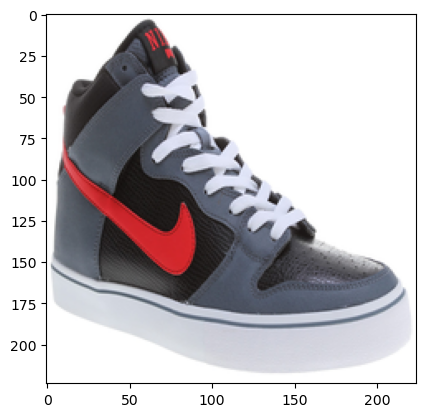

1/1 [==============================] - 0s 11ms/step
This image shows an nike shoe.


In [38]:
img = cv2.imread ('data/test/nike/Image_10.jpg')

img_disp = plt.imread('data/test/nike/Image_10.jpg')
plt.imshow(img_disp)
plt.show()

img= cv2.resize(img,(64,64))
img= img/255
img=img.reshape(-1,64,64,3)

pred = model.predict(img).argmax(axis=1)

if  pred == 0:
    print(f"This image shows an adidas shoe.")
elif pred == 1:
    print(f"This image shows an nike shoe.")

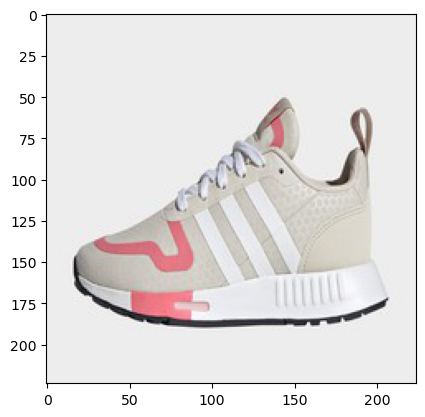

1/1 [==============================] - 0s 9ms/step
This image shows an adidas shoe.


In [39]:
img = cv2.imread ('data/test/adidas/Adidas (18).jpg')

img_disp = plt.imread('data/test/adidas/Adidas (18).jpg')
plt.imshow(img_disp)
plt.show()

img= cv2.resize(img,(64,64))
img= img/255
img=img.reshape(-1,64,64,3)

pred = model.predict(img).argmax(axis=1)

if  pred == 0:
    print(f"This image shows an adidas shoe.")
elif pred == 1:
    print(f"This image shows an nike shoe.")

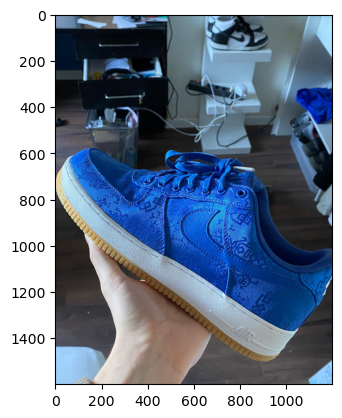

1/1 [==============================] - 0s 11ms/step
This image shows an nike shoe.


In [40]:
img = cv2.imread('./personnal_test/test.jpeg')

img_disp = plt.imread('./personnal_test/test.jpeg')
plt.imshow(img_disp)
plt.show()

img= cv2.resize(img,(64,64))
img= img/255
img=img.reshape(-1,64,64,3)

pred = model.predict(img).argmax(axis=1)

if  pred == 0:
    print(f"This image shows an adidas shoe.")
elif pred == 1:
    print(f"This image shows an nike shoe.")